In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import numpy.random as rnd
import numpy as np
import math
rnd.seed(20161112)

In [73]:
def firmGrowth(years, exportMonths):

    calendarDf = []
    pseudoDf = []
    calendarGr = []
    pseudoGr = []
    calendarCumul = 0
    pseudoCumul = 0
    completeSet = tuple(itertools.combinations(range(12),exportMonths))
    lenSet = len(completeSet)

    for i in range(years+1):
        _temp = completeSet[int(rnd.uniform(high = lenSet))]
        while i == 0 and _temp[0] == 0:
            _temp = completeSet[int(rnd.uniform(high = lenSet))]
        calendarDf.append(list(_temp))
        if i == 0:
            pseudoStart = _temp[0]

    for i in range(len(calendarDf) - 1):
        pseudoDf.append(sum([t >= pseudoStart for t in calendarDf[i]]) + sum(t < pseudoStart for t in calendarDf[i + 1]))
        calendarDf[i] = exportMonths
    calendarDf = calendarDf[:-1]

    for i in range(years - 1):
        calendarGr.append(calendarDf[i + 1] - calendarDf[i]) 
        pseudoGr.append(pseudoDf[i + 1] - pseudoDf[i])
        calendarCumul += calendarGr[i]
        pseudoCumul += pseudoGr[i]
    calendarCumul = calendarCumul / (years - 1) 
    pseudoCumul = pseudoCumul / (years - 1) 

    return calendarDf, pseudoDf, calendarGr, pseudoGr, calendarCumul, pseudoCumul

def countryGrowth(firms, years, exportMonths):
    countryCalendarGr = np.zeros(years - 1)
    countryPseudoGr = np.zeros(years - 1)
    countryCalendarCumul = 0
    countryPseudoCumul = 0

    for k in range(firms):
        calendarDf, pseudoDf, calendarGr, pseudoGr, calendarCumul, pseudoCumul = firmGrowth(years, exportMonths)
        #a, b, c, d, e, f= firmGrowth(years, months)
        countryCalendarGr += np.array(calendarGr)
        countryPseudoGr += np.array(pseudoGr)
    
    countryCalendarGr = countryCalendarGr / firms
    countryPseudoGr = countryPseudoGr / firms

    for i in range(years - 1):
        countryCalendarCumul += countryCalendarGr[i]
        countryPseudoCumul += countryPseudoGr[i]

    countryCalendarCumul = countryCalendarCumul / (years - 1)
    countryPseudoCumul = countryPseudoCumul / (years - 1)

    return countryCalendarGr, countryPseudoGr, countryCalendarCumul, countryPseudoCumul

def simulationCumulGrowth(simulations, firms, years, exportMonths):
    simulCountryCalendarCumul = 0
    simulCountryPseudoCumul = 0
    for i in range(simulations):
        countryCalendarGr, countryPseudoGr, countryCalendarCumul, countryPseudoCumul = \
            countryGrowth(firms, years, exportMonths)
        simulCountryCalendarCumul += countryCalendarCumul
        simulCountryPseudoCumul += countryPseudoCumul
    simulCountryCalendarCumul = simulCountryCalendarCumul / simulations
    simulCountryPseudoCumul = simulCountryPseudoCumul / simulations

    return simulCountryCalendarCumul, simulCountryPseudoCumul 


Firm calendar avg growth: 0.0
Firm pseudo avg growth: -4.08


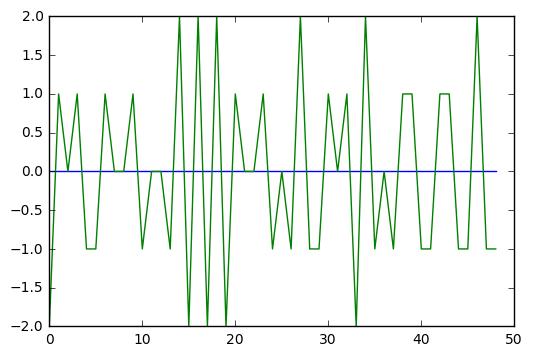

In [70]:
years = 50
calendarDf, pseudoDf, calendarGr, pseudoGr, calendarCumul, pseudoCumul = firmGrowth(years, 6)
print("Firm calendar avg growth: " + str(np.round(calendarCumul * 100, 2)))
print("Firm pseudo avg growth: " + str(np.round(pseudoCumul * 100, 2)))
plt.plot(range(years -1), calendarGr)
plt.plot(range(years - 1), pseudoGr)
plt.show()

Country calendar avg growth: 0.0
Country pseudo avg growth: -0.75


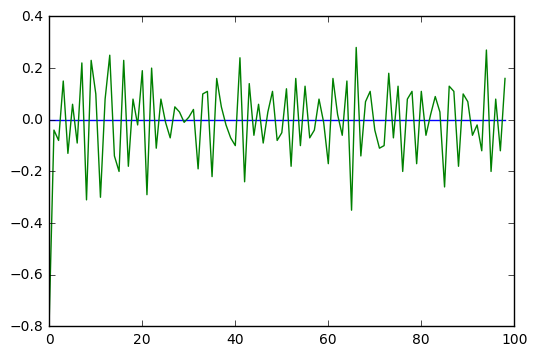

In [71]:
years = 100
exportMonths = 6
firms = 100
countryCalendarGr, countryPseudoGr, countryCalendarCumul, countryPseudoCumul = countryGrowth(firms, years, exportMonths)

print("Country calendar avg growth: " + str(np.round(countryCalendarCumul * 100, 2)))
print("Country pseudo avg growth: " + str(np.round(countryPseudoCumul * 100, 2)))

plt.plot(range(years - 1), countryCalendarGr)
plt.plot(range(years - 1), countryPseudoGr)
plt.show()

In [76]:
simulations = 100
firms = 100
years = 20
exportMonths = 6

simulCountryCalendarCumul, simulCountryPseudoCumul = simulationCumulGrowth(simulations, firms, years, exportMonths)

print("Simulations of country calendar avg growth: " + str(np.round(simulCountryCalendarCumul * 100, 2)))
print("Simulations of country pseudo avg growth: " + str(np.round(simulCountryPseudoCumul * 100, 2)))

Simulations of country calendar avg growth: 0.0
Simulations of country pseudo avg growth: -4.46
